<a href="https://colab.research.google.com/github/AnIsAsPe/ElementosEstadisticaMachineLearningPython/blob/master/Semana7/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cargar bibiliotecas

In [ ]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.2)


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cargar datos

Dataset
M. Cassotti, D. Ballabio, V. Consonni, A. Mauri, I. V. Tetko, R. Todeschini (2014). Prediction of acute aquatic toxicity towards daphnia magna using GA-kNN method, Alternatives to Laboratory Animals (ATLA), 42,31:41; doi: 10.1177/026119291404200106

In [ ]:
#dataset: 
datos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00505/qsar_aquatic_toxicity.csv',
                    names=  ['TPSA(Tot)', 'SAacc', 'H-050', 'MLOGP', 
                             'RDCHI', 'GATS1p', 'nN', 'C-040','acuatic toxicity'],
                    sep=";", header=None)
                    
print(datos.shape)
datos.head()

(546, 9)


,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,acuatic toxicity
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


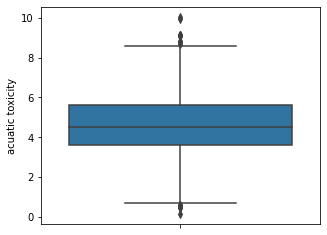

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(y='acuatic toxicity', data=datos)

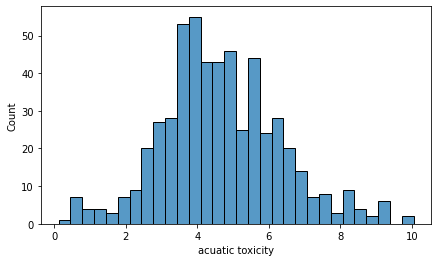

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(x='acuatic toxicity', data=datos, bins=30 )
plt.show()

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TPSA(Tot)         546 non-null    float64
 1   SAacc             546 non-null    float64
 2   H-050             546 non-null    int64  
 3   MLOGP             546 non-null    float64
 4   RDCHI             546 non-null    float64
 5   GATS1p            546 non-null    float64
 6   nN                546 non-null    int64  
 7   C-040             546 non-null    int64  
 8   acuatic toxicity  546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


# Separar datos en características y variable a predecir

In [ ]:
y = datos['acuatic toxicity']
X = datos.drop('acuatic toxicity', axis=1)

## Separar en conjunto de entrenamiento y prueba

In [ ]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split (X, y,
                                                             test_size = 0.2,
                                                             shuffle = True,
                                                             random_state = 8 )

In [ ]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Conjunto de entrenamiento")
print("X: ", X_entrena.shape)
print("y: ", y_entrena.shape)

print("Conjunto de prueba")
print("X: ", X_prueba.shape)
print("y: ", y_prueba.shape)


Conjunto de entrenamiento
X:  (436, 8)
y:  (436,)
Conjunto de prueba
X:  (110, 8)
y:  (110,)


# Regresión lineal

In [ ]:
modelo = LinearRegression().fit(X_entrena, y_entrena)
r2_model = modelo.score(X_entrena, y_entrena)
print('R^2:', r2_model)

R^2: 0.47122461905172747


In [ ]:
columnas = X.columns
coeficientes = pd.DataFrame({'coef':modelo.coef_,
                             'variable':list(columnas)})
coeficientes = coeficientes.sort_values('coef').reset_index(drop=True)
print('Intercept:', modelo.intercept_)
coeficientes

Intercept: 2.778188313344917


,coef,variable
0,-0.645890,GATS1p
1,-0.229370,nN
2,-0.014959,SAacc
3,0.011286,C-040
4,0.023825,TPSA(Tot)
5,0.030166,H-050
6,0.366262,MLOGP
7,0.666928,RDCHI


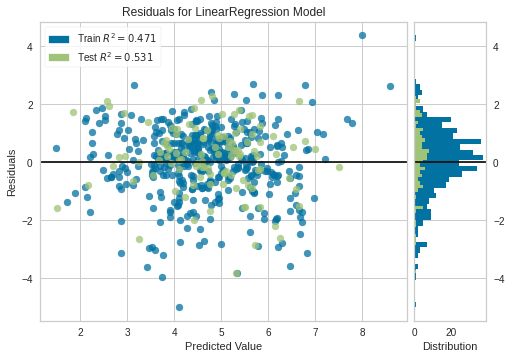

In [ ]:
from yellowbrick.regressor import ResidualsPlot
grafico_errores = ResidualsPlot(LinearRegression(), qqplot=False, hist=True)
grafico_errores.fit(X_entrena, y_entrena)
grafico_errores.score(X_prueba, y_prueba)  # Evaluate the model on the test data
grafico_errores.show()              

# Regresión con statsmodels

In [ ]:
X_a = X_entrena
X_a['constant'] = 1
modelo = sm.OLS(y_entrena, X_a).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:       acuatic toxicity   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     47.57
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.47e-54
Time:                        21:18:26   Log-Likelihood:                -701.46
No. Observations:                 436   AIC:                             1421.
Df Residuals:                     427   BIC:                             1458.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TPSA(Tot)      0.0238      0.003      8.071      0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Calculo de [$R^2$](https://docs.google.com/presentation/d/1k0aYwEBzaaAkWjX6jRKAc40nKHi3FROkJwtXCOE22mI/edit#slide=id.ga8926b2cd2_0_14) 

 $MSE = \cfrac{1}{n}\sum{( y - y_{pred})}^2$



 $R^2 	= 1 -  \cfrac{MSE(modelo)}{MSE(linea~base)}$


In [ ]:
y_linea = modelo.predict(X_entrena)

df= pd.DataFrame({'y_real': y_entrena,
                              'y_linea':y_linea})
df['error'] = (df['y_real']- df['y_linea'])

df['error^2'] =pow(df['error'],2)


In [ ]:
df.head()

,y_real,y_linea,error,error^2
314,4.263,3.829207,0.433793,0.188176
227,3.485,4.151155,-0.666155,0.443762
517,5.381,5.513991,-0.132991,0.017687
364,1.820,2.782495,-0.962495,0.926397
401,4.390,5.104184,-0.714184,0.510059


In [ ]:

promedio_yreal = df['y_real'].mean()
MSE_base = pow((df['y_real'] - promedio_yreal),2).sum() / len (df)
print(MSE_base)

2.764884155979084


In [ ]:
MSE_modelo = df['error^2'].sum() / len(df)
MSE_modelo

1.462002672855683

In [ ]:
R2 = 1 - MSE_modelo/MSE_base
R2

0.4712246190517275

## Normalizar las caractísticas

In [ ]:
X_estandarizados=X.copy()
columnas = X.columns

scaler = StandardScaler()

X_estandarizados[columnas] = scaler.fit_transform(X[columnas])

##Tarea:
1. Calcular R2 con el método visto para el conjunto de entrenamiento
2. Calcular los coeficientes del modelo con X_estandarizados


#Recursos
https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

